In [592]:
import numpy as np

# data processing
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve,auc
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
from scipy.stats import randint as sp_randint

In [593]:
df_original = pd.read_csv('/content/Student_academic.csv')

In [594]:
df_original.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [595]:
df_original.rename(columns={"Nacionality": "Nationality"}, inplace=True)

In [596]:
df_original.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [597]:
df_original.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [598]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

This machine learning model is predicting a very interesting question: Using ca 3600 (all the data minus ca 800 enrolled students we will test on) rows of data, are we able to train a model to see what the most important factors are in order to predict whether or not a student will graduate university or drop out? Can it all be distilled down to just a few key factors?

And this is coming from someone who has dropped out of Uni twice so I can share some of my experiences on this as well! I can aleardy now imagine that a lot of outside factors won't be on here that are mental health related. Is the person getting a good night's sleep on a regular basis? Are they getting their emotional needs met? Do they have a good support net? etc. etc.

In [599]:
df_original['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

The Enrolled values is the small subset of students we want to test our models on later after we have trained it. So let's separate this from the original dataset and save for later. I will call what's remainging df for convenience, renaming the oringal df oringinal_df, and the test set df_test

In [600]:
df = df_original.loc[(df_original['Target'] == 'Graduate') |
 (df_original['Target'] == 'Dropout')]
df.reset_index(inplace= True)
df.drop(['index'], axis=1, inplace= True)
df_test = df_original.loc[(df_original['Target'] == 'Enrolled')]
# Now in retrospect this one is called df_test_original for future convenience
# since the three different classifiers will remove different columns. For the
# individual classifiers, this will be called df_test
df_test.reset_index(inplace= True)
df_test.drop(['index', 'Target'], axis=1, inplace= True)

<ipython-input-600-5e6bfc5c04d4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['index'], axis=1, inplace= True)
<ipython-input-600-5e6bfc5c04d4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['index', 'Target'], axis=1, inplace= True)


In [601]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
3626,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
3627,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
3628,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [602]:
df_test

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,9,1,10,1,1,1,13,28,6,...,0,0,6,14,2,11.000000,0,10.8,1.4,1.74
1,1,1,1,16,1,1,1,13,14,8,...,0,0,7,8,6,13.500000,0,16.2,0.3,-0.92
2,1,9,4,13,1,1,1,1,28,5,...,0,0,8,9,8,11.425000,0,12.7,3.7,-1.70
3,1,1,1,10,1,1,1,13,28,10,...,0,0,6,12,4,11.000000,0,7.6,2.6,0.32
4,1,1,1,6,1,1,1,13,14,4,...,2,0,5,7,4,13.000000,0,9.4,-0.8,-3.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,1,3,4,16,1,1,1,3,28,4,...,0,0,6,9,3,11.666667,0,9.4,-0.8,-3.12
790,1,9,2,16,1,1,1,1,14,4,...,0,0,6,6,6,13.000000,0,10.8,1.4,1.74
791,1,1,1,5,1,1,1,1,28,6,...,0,0,6,8,2,11.333333,0,10.8,1.4,1.74
792,1,14,1,5,1,1,1,13,14,8,...,0,2,6,7,5,12.200000,0,13.9,-0.3,0.79


Everything is numbers except Target, meaning that we don't have to do any Encoding except for this column. Let's map it so that Dropout is 0 and Graduate is 1

In [603]:
# df.Target.replace({'Dropout' : 0, 'Graduate' : 1}, inplace= True)
labelencoder = LabelEncoder()
df['Target'] = labelencoder.fit_transform(df['Target'])

<ipython-input-603-ba43649401cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = labelencoder.fit_transform(df['Target'])


In [604]:
df['Target'].value_counts()

1    2209
0    1421
Name: Target, dtype: int64

Since we have so much data, I will choose to just create a model and from there look at a correlation matrix and the feature importance, and make improvements to both the dataset and the model from there. For now we will visualize the data, split it using train_test_split and standardize it:

Marital status


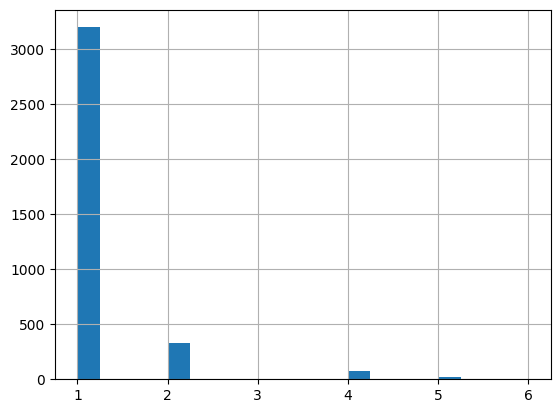

Application mode


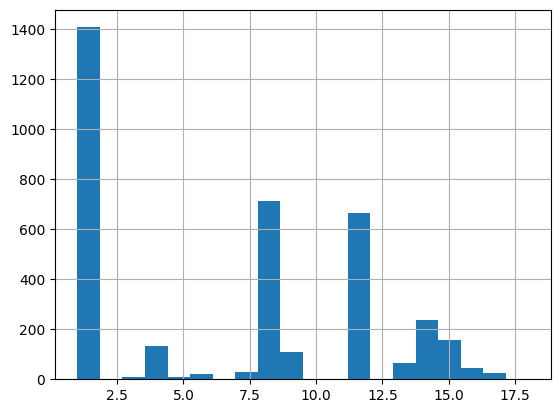

Application order


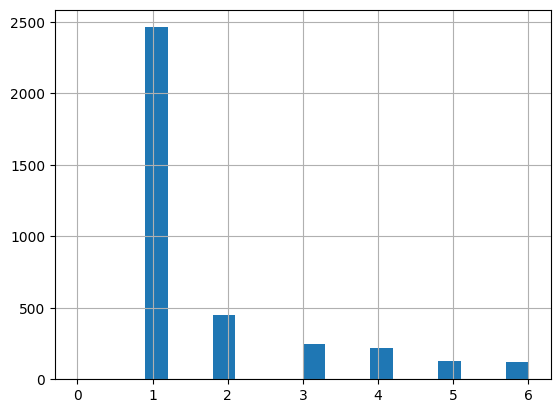

Course


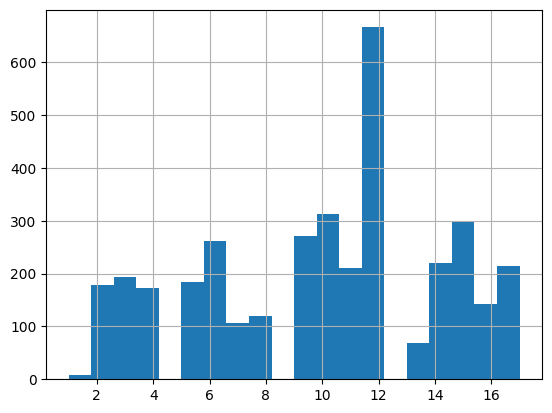

Daytime/evening attendance


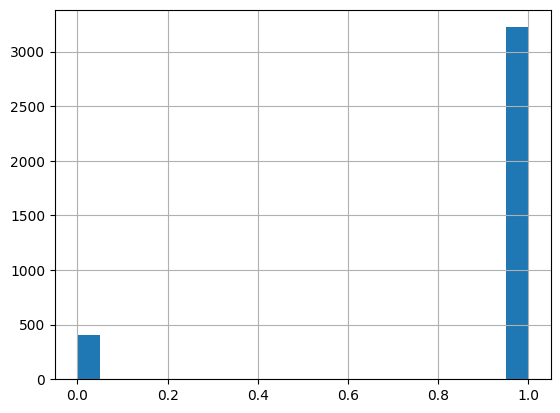

Previous qualification


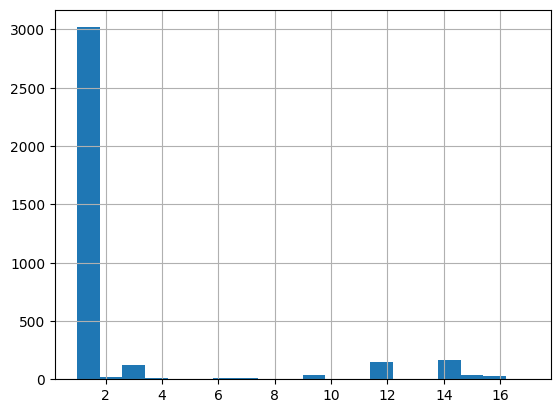

Nationality


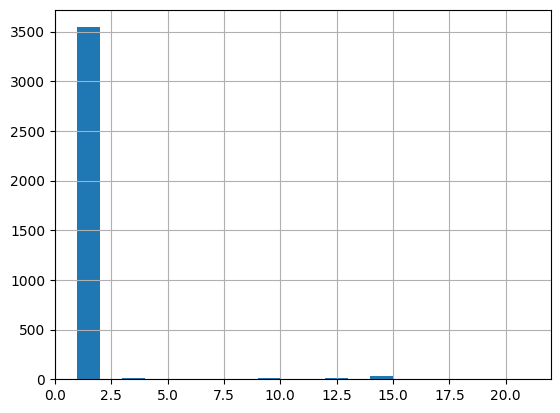

Mother's qualification


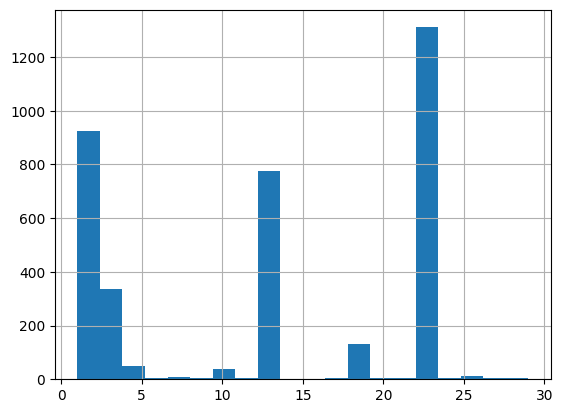

Father's qualification


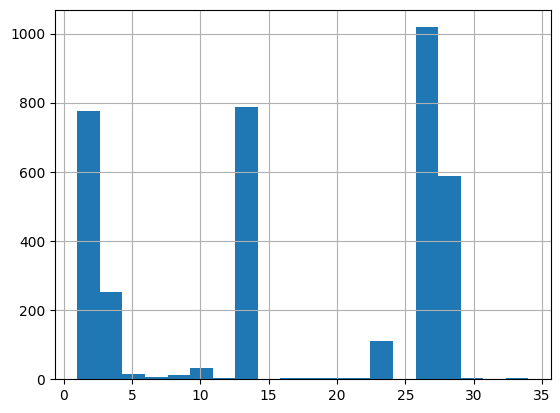

Mother's occupation


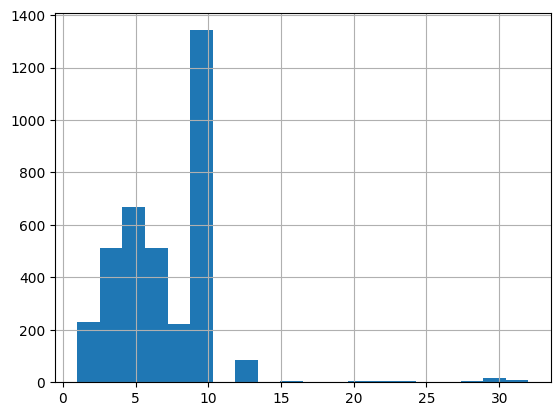

Father's occupation


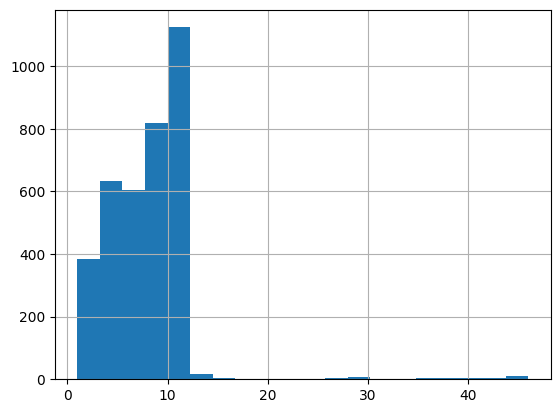

Displaced


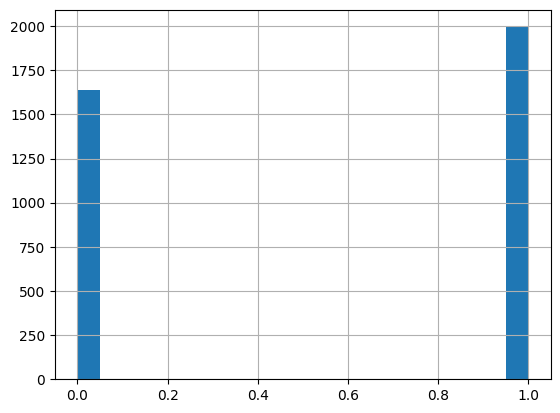

Educational special needs


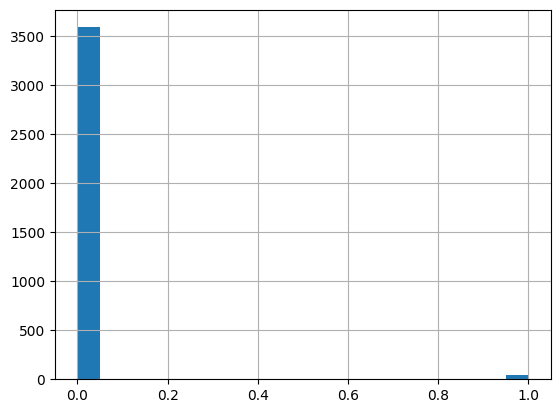

Debtor


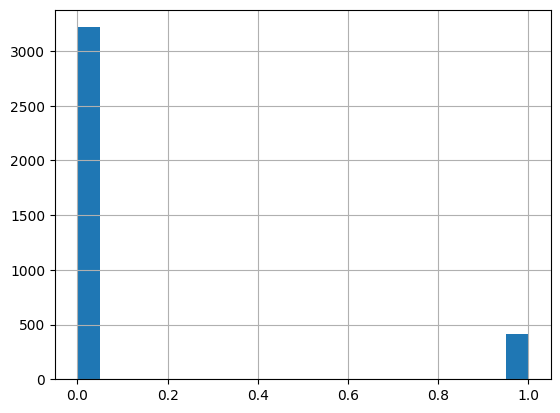

Tuition fees up to date


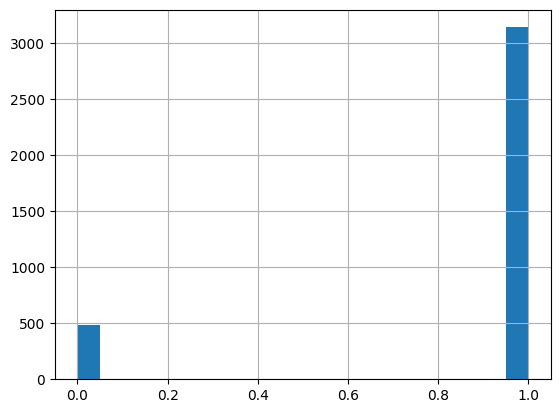

Gender


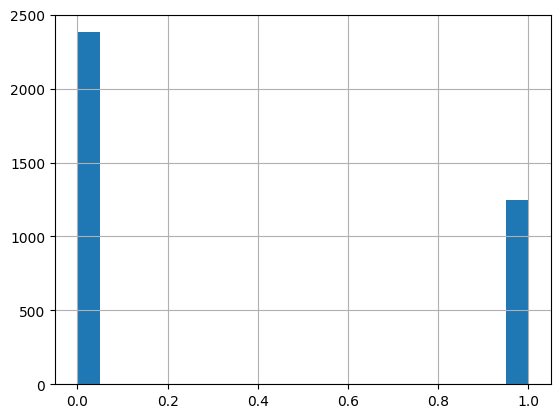

Scholarship holder


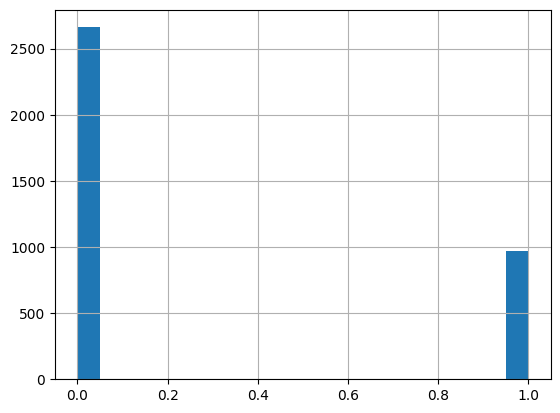

Age at enrollment


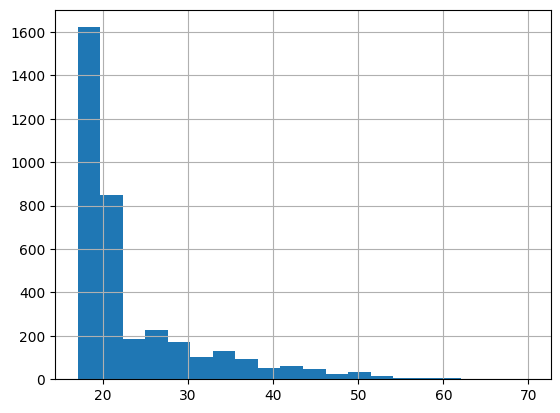

International


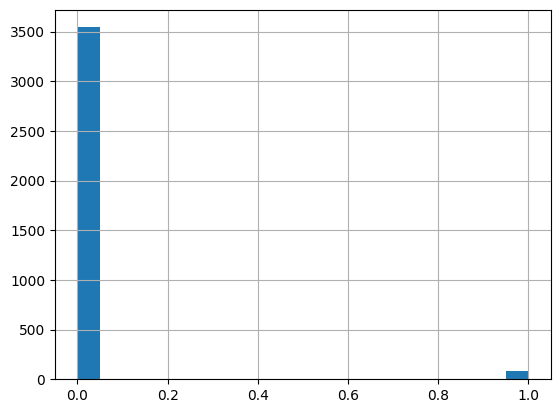

Curricular units 1st sem (credited)


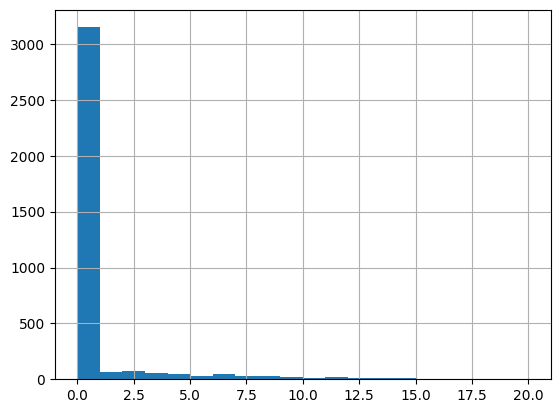

Curricular units 1st sem (enrolled)


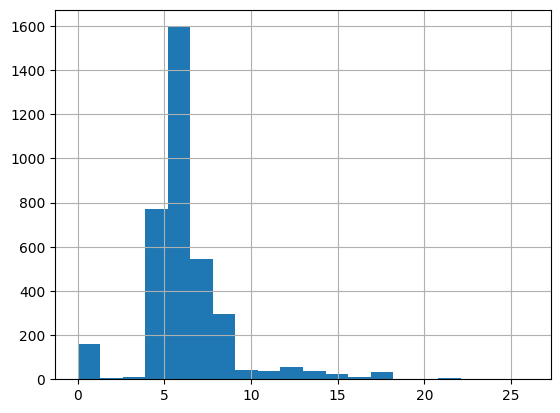

Curricular units 1st sem (evaluations)


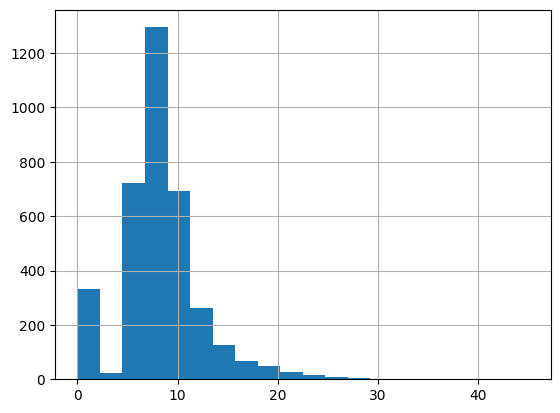

Curricular units 1st sem (approved)


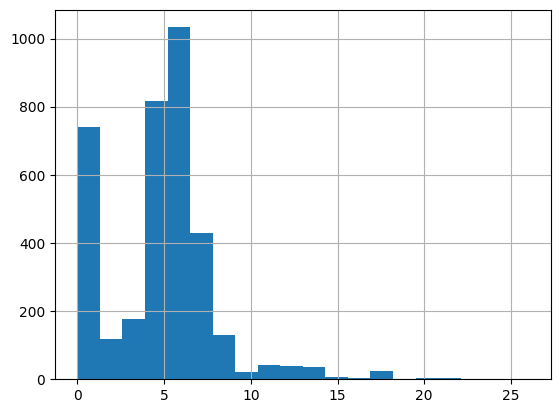

Curricular units 1st sem (grade)


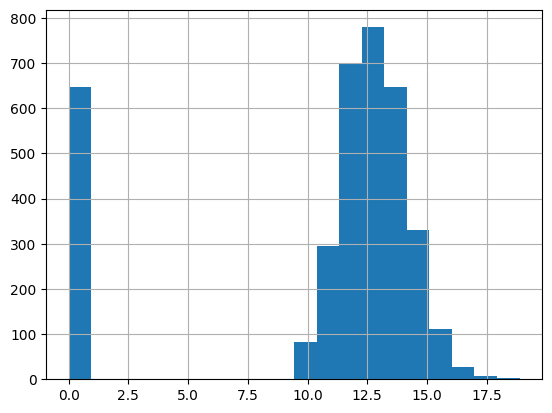

Curricular units 1st sem (without evaluations)


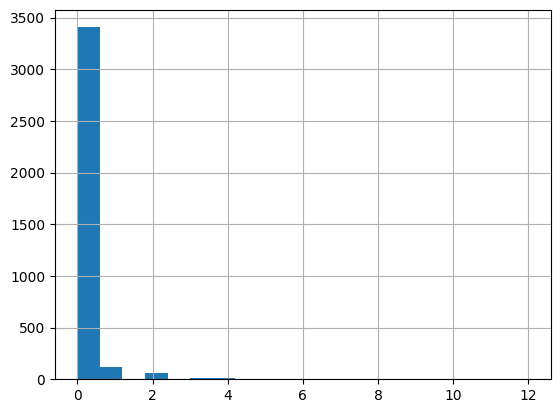

Curricular units 2nd sem (credited)


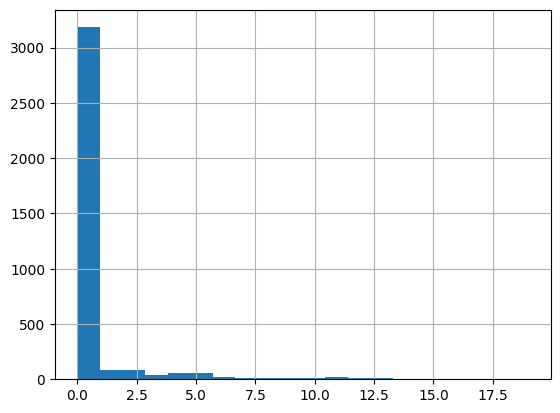

Curricular units 2nd sem (enrolled)


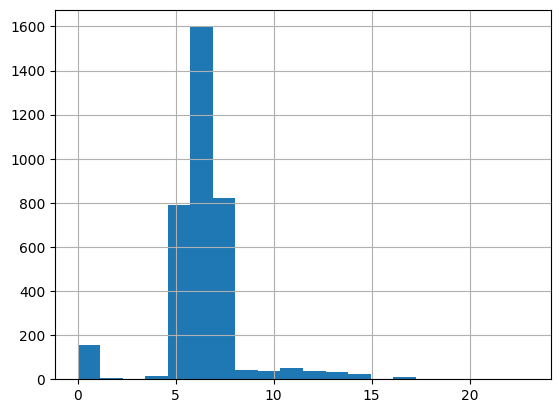

Curricular units 2nd sem (evaluations)


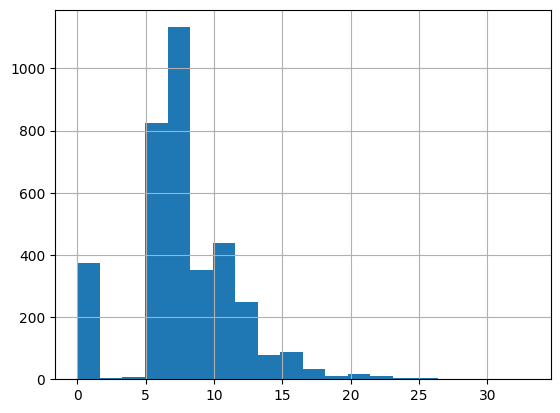

Curricular units 2nd sem (approved)


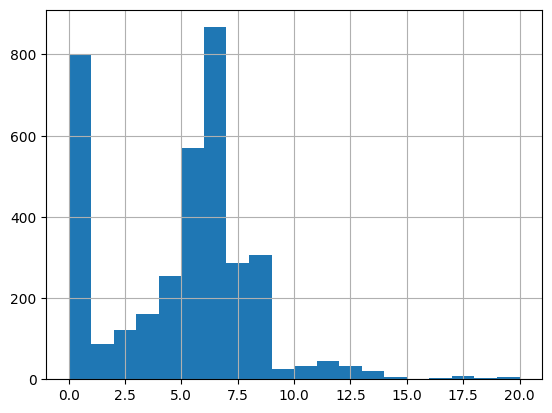

Curricular units 2nd sem (grade)


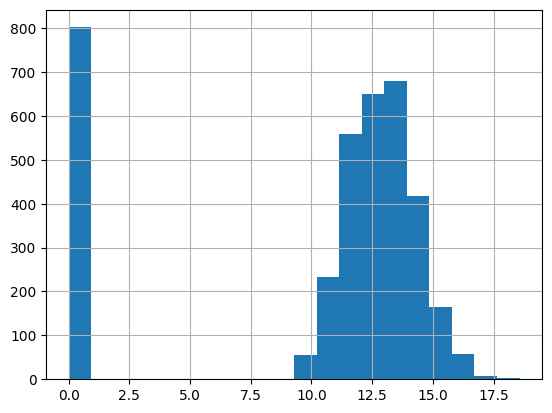

Curricular units 2nd sem (without evaluations)


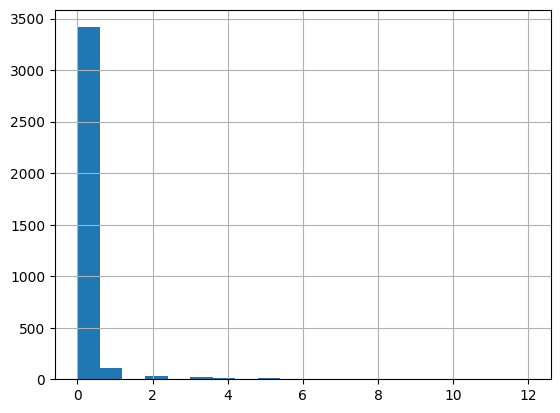

Unemployment rate


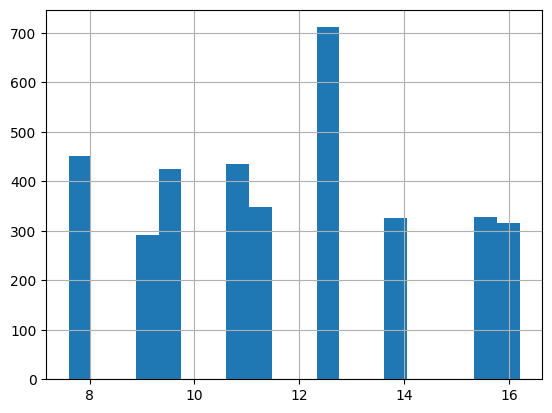

Inflation rate


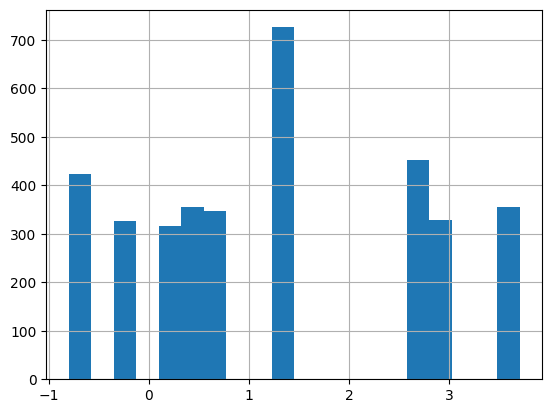

GDP


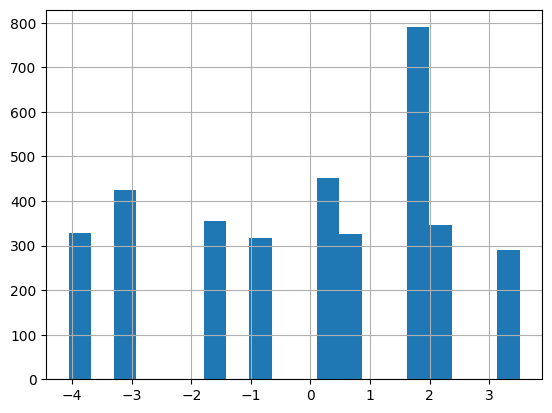

Target


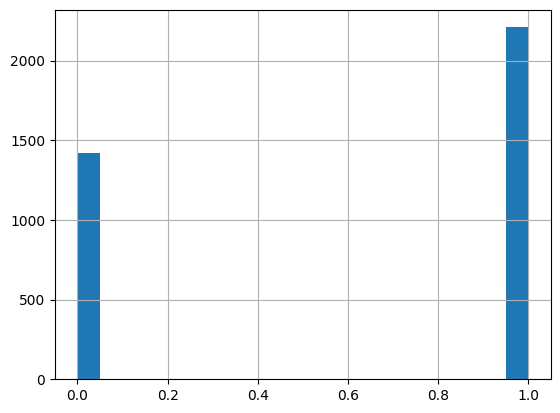

In [605]:
for column in df.columns:
  print(column)
  df[column].hist(bins=20)
  plt.show()

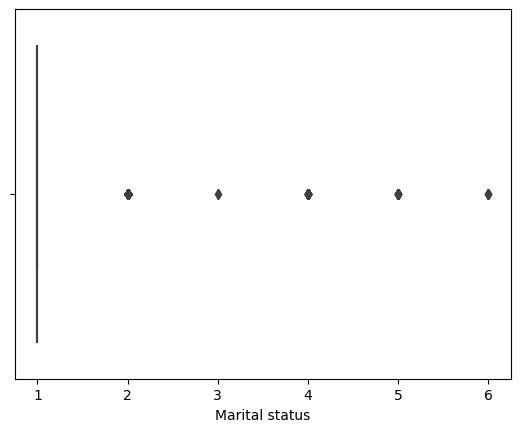

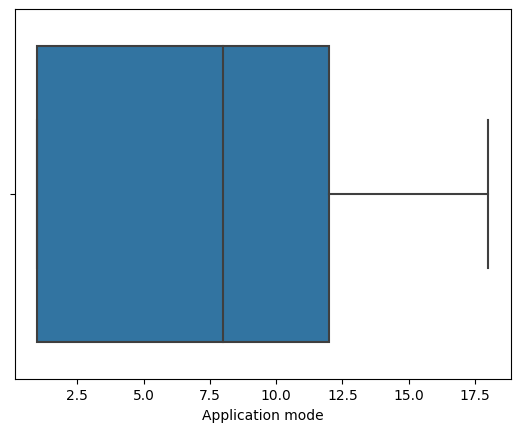

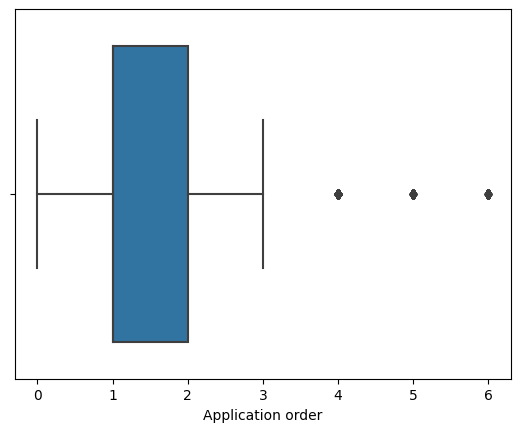

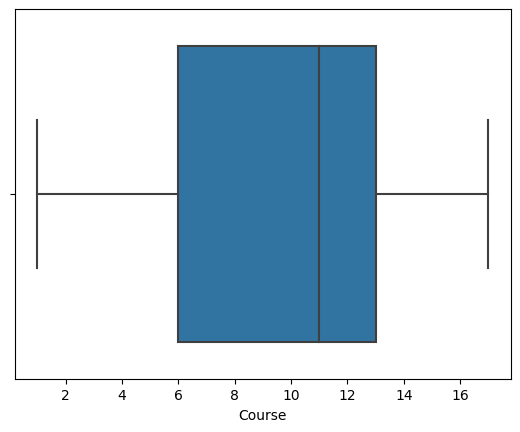

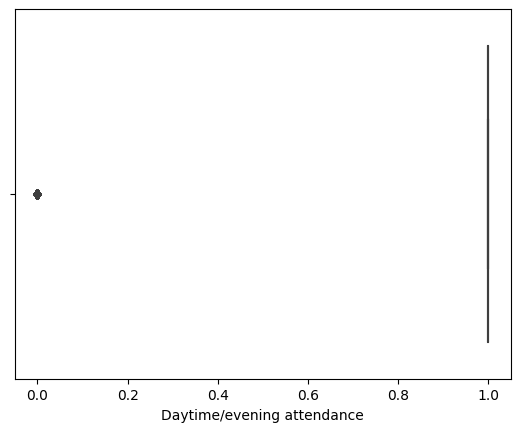

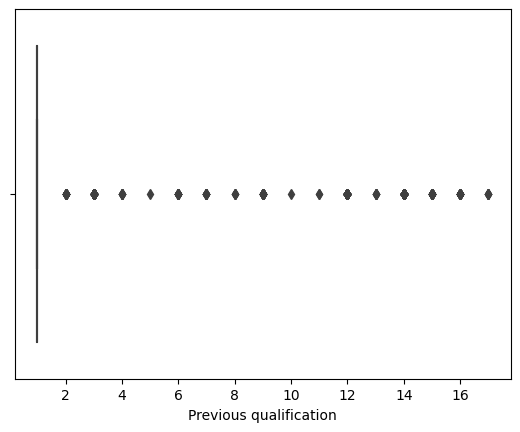

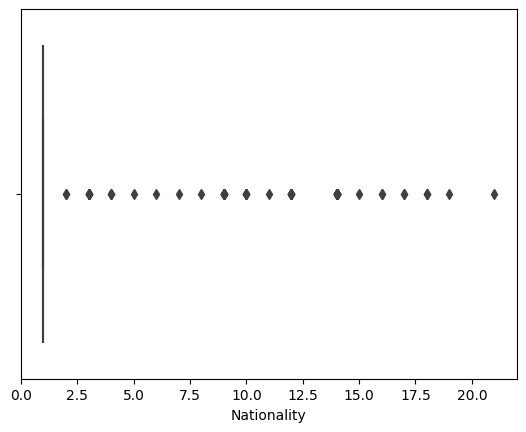

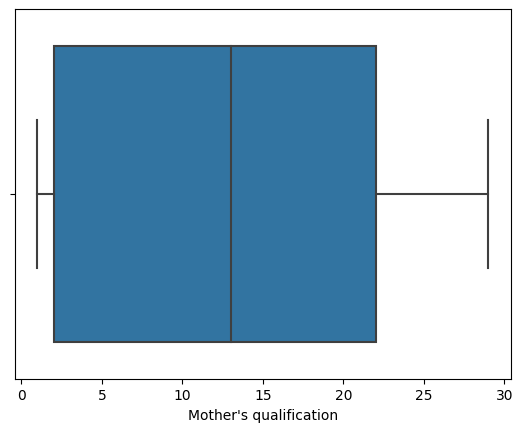

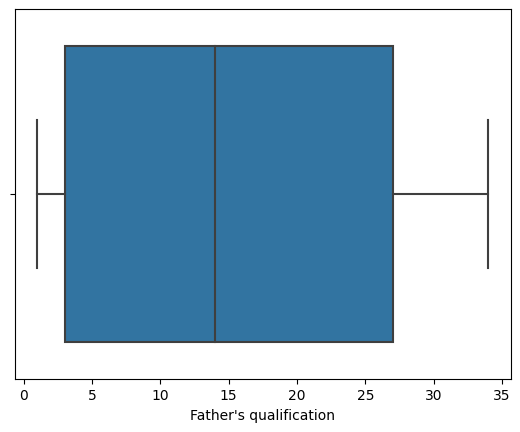

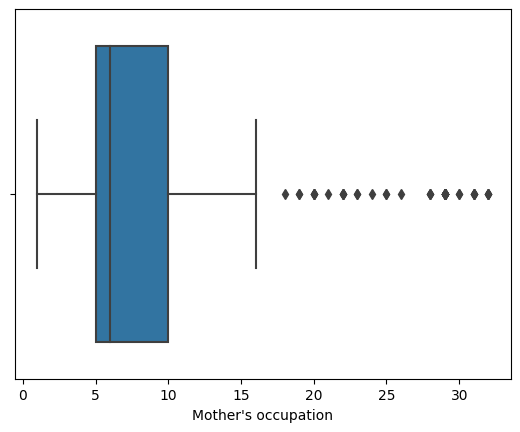

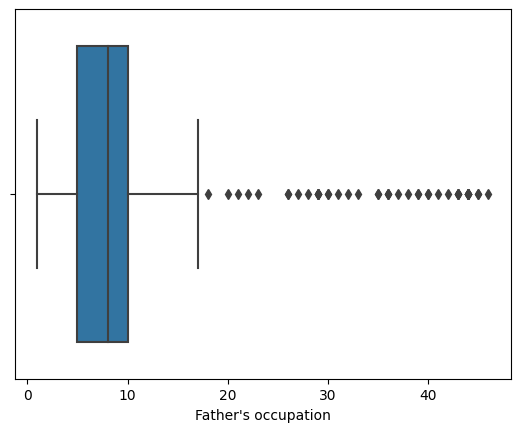

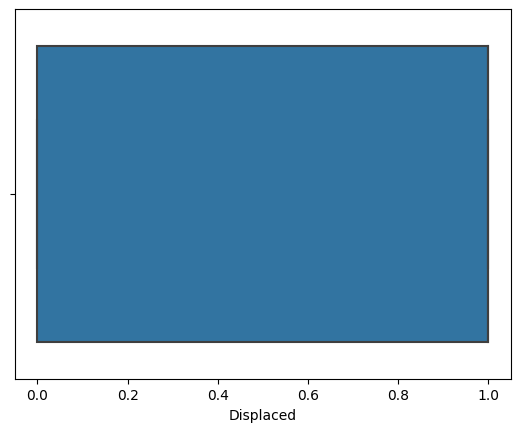

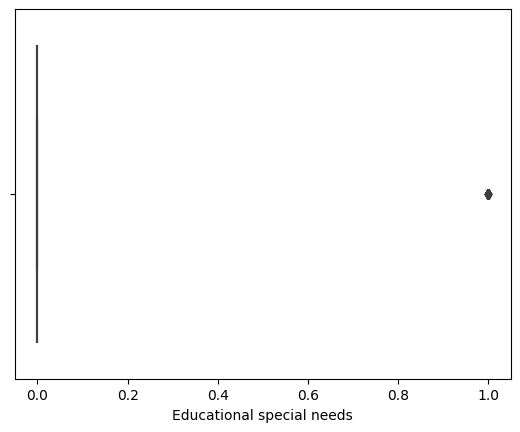

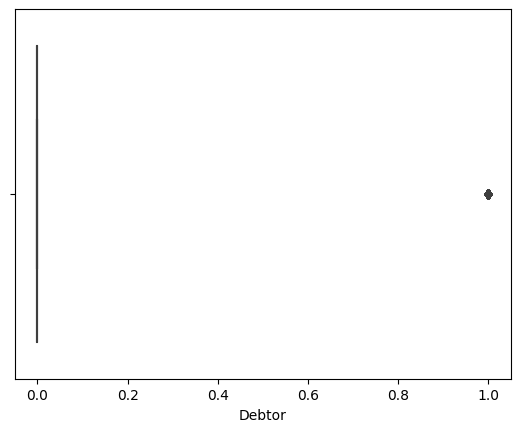

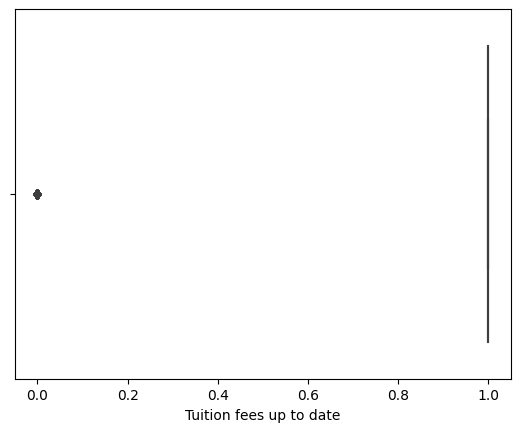

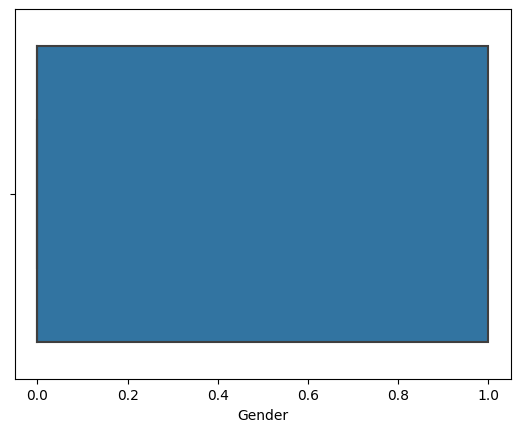

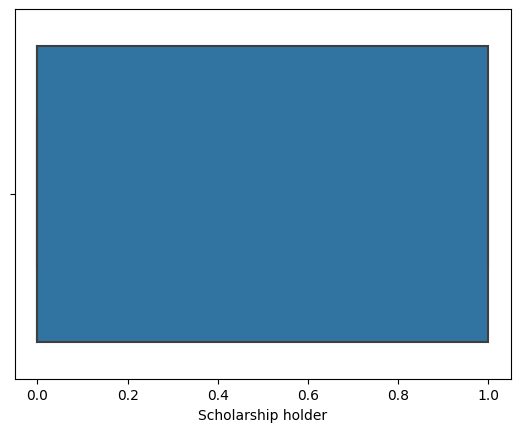

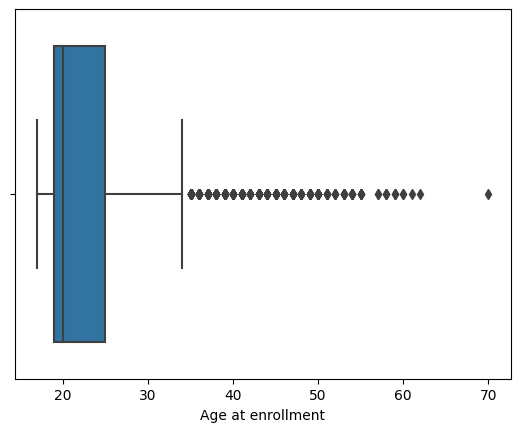

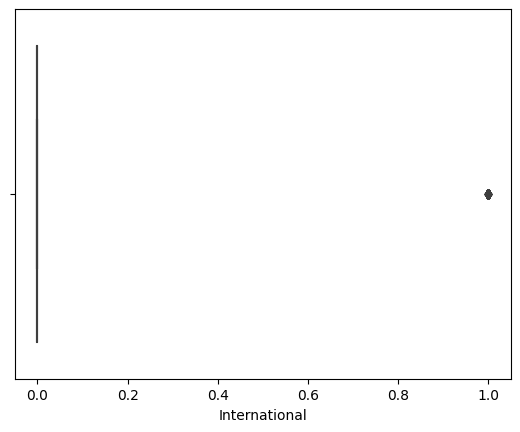

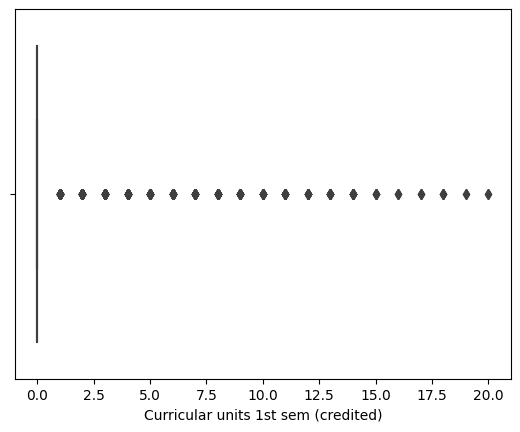

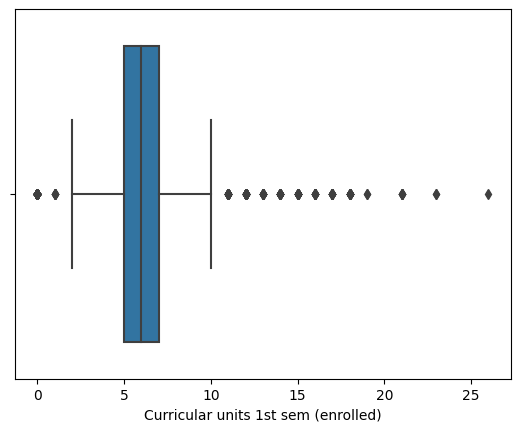

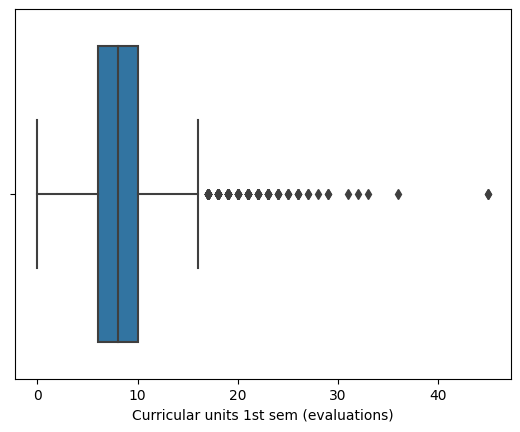

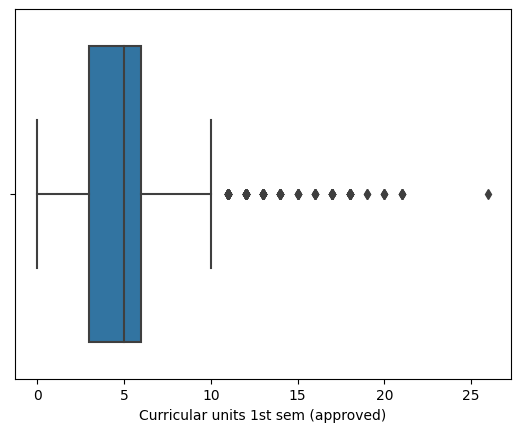

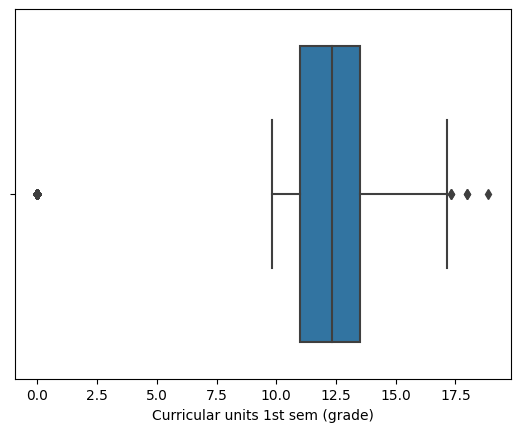

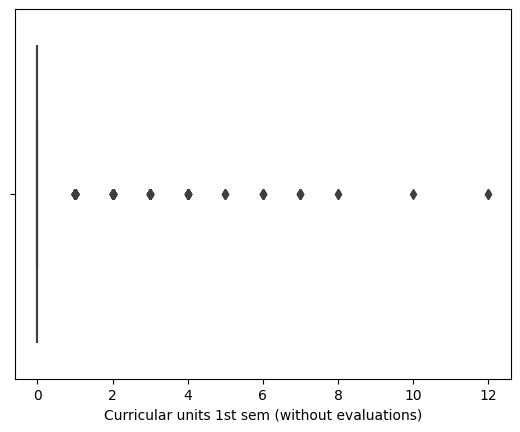

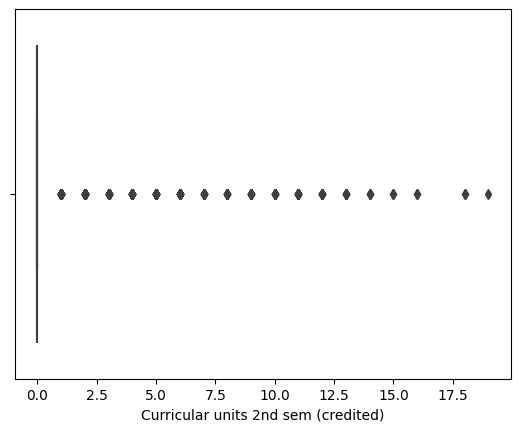

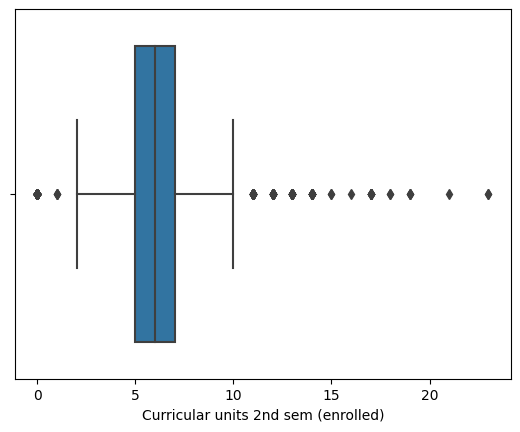

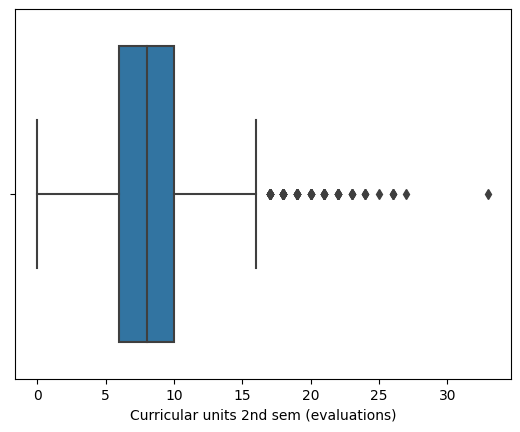

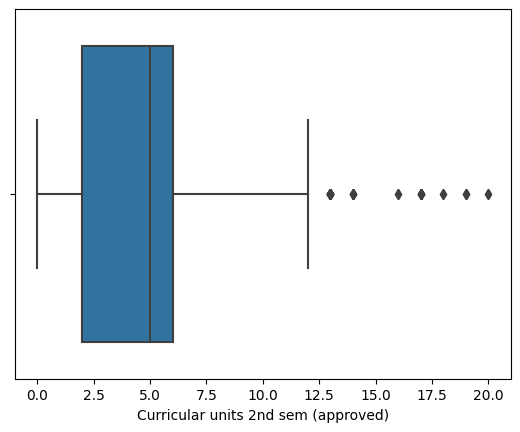

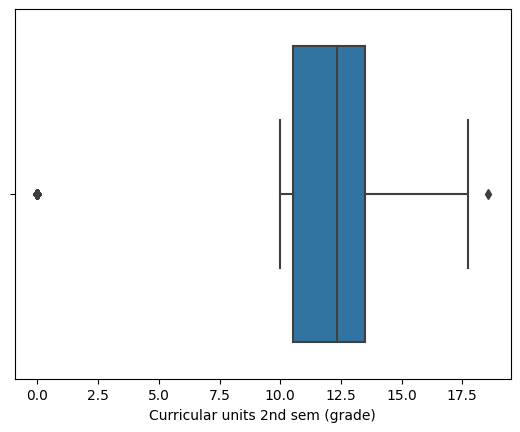

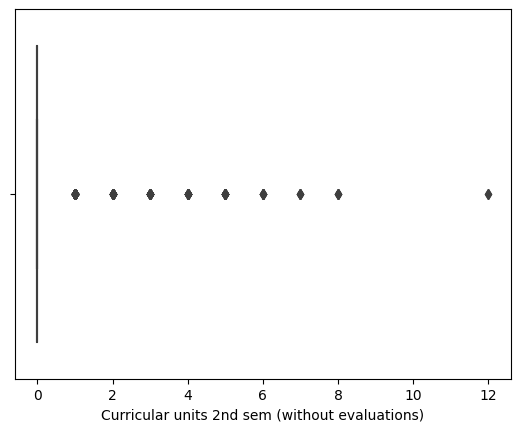

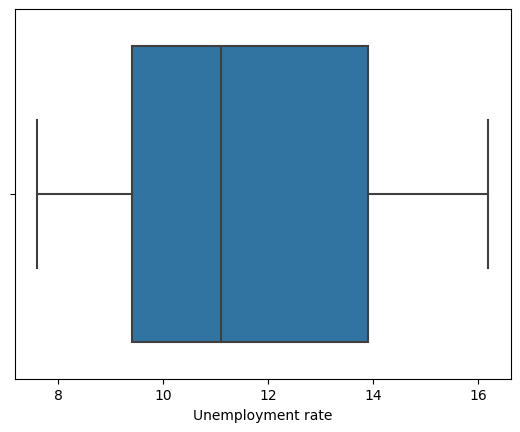

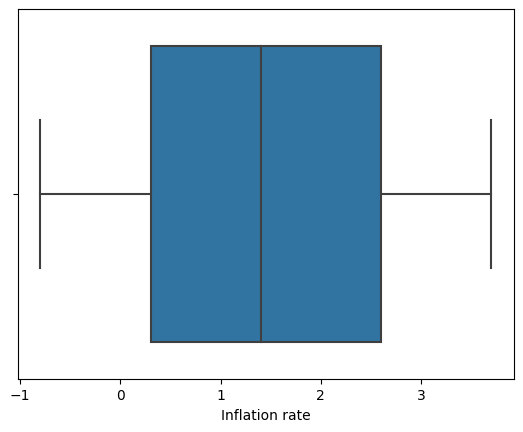

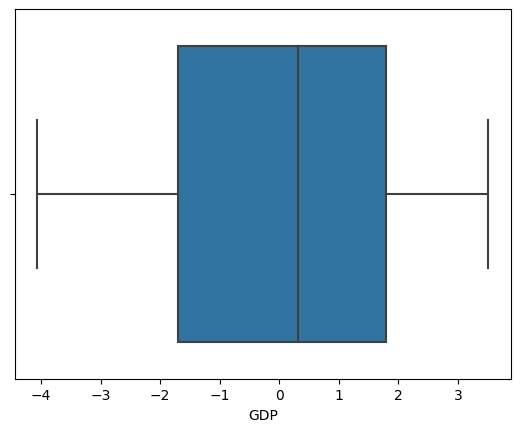

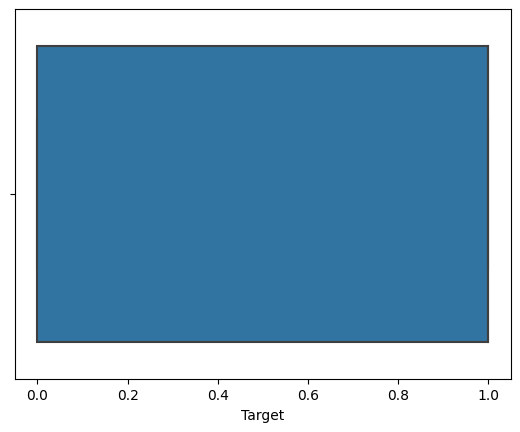

In [606]:
for column in df.columns:
  sns.boxplot(x=df[column], data = df)
  plt.show()

In [607]:
# I see a potential outlier in Age:
old_people_indexes = list(df[df['Age at enrollment'] > 60].index)
old_people_indexes

for i in old_people_indexes:
  print(f"Student #{i}")
  print(df.iloc[i])
  print('\n')

Student #565
Marital status                                     4.00
Application mode                                  12.00
Application order                                  2.00
Course                                             9.00
Daytime/evening attendance                         1.00
Previous qualification                            12.00
Nationality                                        1.00
Mother's qualification                            22.00
Father's qualification                            27.00
Mother's occupation                               10.00
Father's occupation                                8.00
Displaced                                          0.00
Educational special needs                          0.00
Debtor                                             1.00
Tuition fees up to date                            0.00
Gender                                             1.00
Scholarship holder                                 0.00
Age at enrollment                  

One of them graduated! Let's fucking gooo<br>
But I will have to remove the 70 year old outlier. At least we know that unfortunately he did not graduate. And we can come back to him later to see how the important factors match up with his data!

Let's get started on the model and fine tune as we go

In [608]:
X = df.drop(columns = 'Target')
y = df['Target']

In [609]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [610]:
# Standardizing the data
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)
# After we have created a model we might see if PCA will lower or improve
# the accuracy

In [611]:
X_train

array([[-0.29922036, -1.10101569, -0.5639619 , ..., -0.30949207,
         0.11903334,  0.77497081],
       [-0.29922036,  0.9928609 , -0.5639619 , ...,  0.29289732,
        -0.52748692,  0.79712735],
       [-0.29922036, -1.10101569,  3.17006766, ...,  0.29289732,
        -0.52748692,  0.79712735],
       ...,
       [-0.29922036, -1.10101569, -0.5639619 , ..., -0.30949207,
         0.11903334,  0.77497081],
       [-0.29922036, -1.10101569,  0.92964992, ..., -0.19654406,
        -0.45565133,  0.89904744],
       [-0.29922036,  0.23145123, -0.5639619 , ..., -0.30949207,
         0.11903334,  0.77497081]])

In [612]:
logR = LogisticRegression()

In [613]:
logR.fit(X_train, y_train)

LogisticRegression()

In [614]:
acc_log = round(logR.score(X_train, y_train) * 100, 2)
print(acc_log)

91.53


In [615]:
logR.score(X_train, y_train)

0.9152892561983471

In [616]:
logR.score(X_test, y_test)

0.9077134986225895

So this is our baseline test score with Logistic Regression that we want to improve. And it's already really good, 90.8% accuracy!<br>
A single shot at improvement before understanding of which columns in the dataset are actually important, let's see if we can improve the test score to simply tweaking the paramenters of the model:

**Improving the model by changing parameters**

In [617]:
logR2 = LogisticRegression(random_state = 0, C = 1,
                          fit_intercept = True)
#C is a regularization parameter that penalizes extreme values

In [618]:
logR2.fit(X_train, y_train)

LogisticRegression(C=1, random_state=0)

In [619]:
logR2.score(X_train, y_train)

0.9152892561983471

In [620]:
logR2.score(X_test, y_test)

0.9077134986225895

In [621]:
logR.score(X_test, y_test) == logR2.score(X_test, y_test)

True

Absolutely no difference<br>
So let's now look at it from the angle of which attributes contributes the most to the target attribute? **What are our feature importances?** The coefficients give a first indication. Look at positive/negative as well as absolute value size

In [622]:
coefficients = logR.coef_
coefficients

array([[ 1.45106269e-01, -1.53278434e-01, -2.73978830e-02,
        -3.81813078e-01, -1.74677911e-01,  1.44660719e-01,
        -7.19160261e-01, -1.10494425e-01,  8.51745656e-02,
         1.90766581e-01,  5.09692307e-02, -1.07792789e-01,
        -2.17627381e-02, -3.06281340e-01,  9.45914056e-01,
        -1.79953556e-01,  3.63726114e-01, -2.52952410e-01,
         8.55084147e-01, -4.61271148e-01, -6.63170632e-01,
         6.68093359e-02,  1.89600165e+00, -3.14110285e-01,
         1.63524453e-02, -2.86033895e-01, -1.42619404e+00,
        -2.83445105e-01,  2.98464942e+00,  3.54376026e-01,
         2.82281796e-01, -1.55431293e-01,  4.61265294e-05,
        -6.15547674e-02]])

<Axes: ylabel='Feature'>

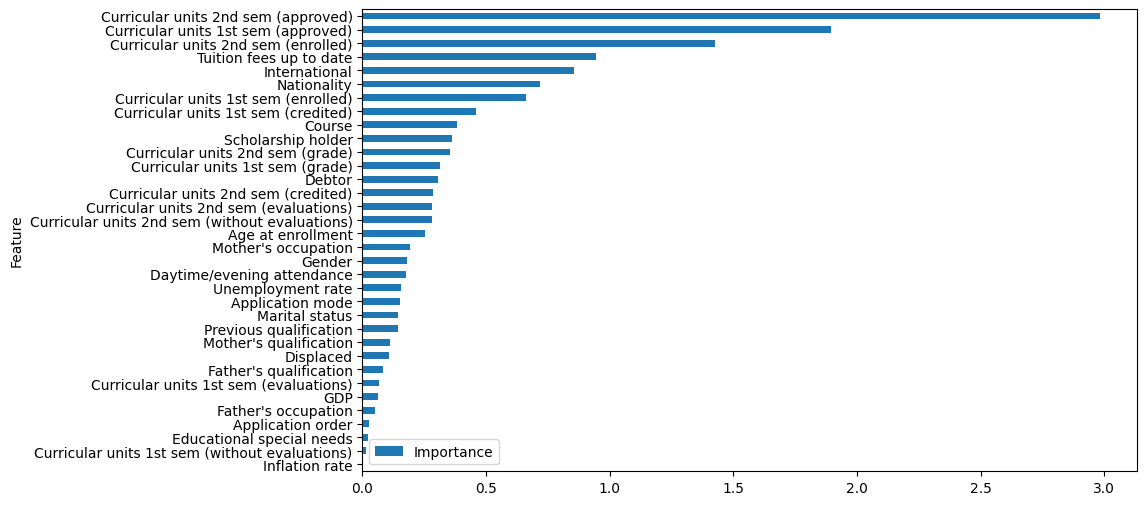

In [623]:
avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns,
                                   'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance',
                                                    ascending= True)
feature_importance.plot(x='Feature', y='Importance',
                        kind='barh', figsize=(10,6))

One very interesting observations here is that one's mother's occupation and qualification are both more important that one's father's occupation and qualification<br>
It is also very reassuring and life-affirming insights to see that educational special needs is not a hindrance for graduation and that gender does not matter





Before removing any features, let's look at a correlation matrix as well

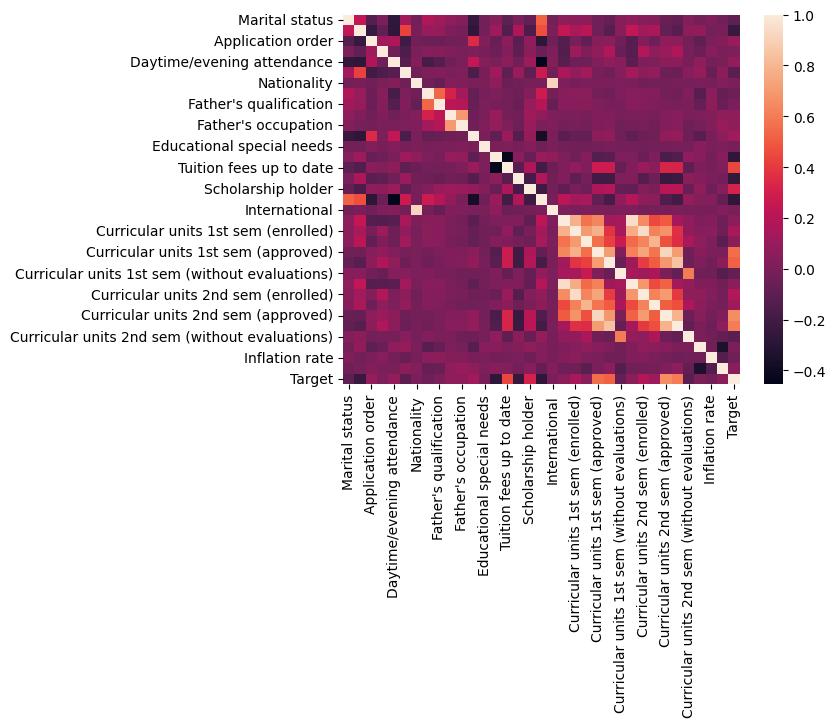

In [624]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix)
plt.show()

From looking at both of these, we will do the following:
*   Remove ["Inflation rate", "Curricular units 1st sem (without evaluations)", "Educational special needs", "Application order", "Father's occupation", "GDP", "Curricular units 1st sem (evaluations)", "Father's qualification"]. Let's start with that at least
*   We will also remove Nationality since 'Nationality' and 'International Student' are the most correlated columns in the entire dataset and Nationality is the least important once
<br>
Since, we will do this with our two other models to compare Feature Importance, I will save the current df with 3636 rows in a df for future convenience


In [625]:
df_before_feature_engineering = df
df_improved = df.drop(["Inflation rate", "Curricular units 1st sem (without evaluations)",
                       "Educational special needs", "Application order", "Father's occupation",
                       "GDP", "Curricular units 1st sem (evaluations)",
                       "Father's qualification"], axis=1)
df_improved

,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Mother's occupation,Displaced,Debtor,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Target
0,1,8,2,1,1,1,13,6,1,0,...,0,0.000000,0,0,0,0,0.000000,0,10.8,0
1,1,6,11,1,1,1,1,4,1,0,...,6,14.000000,0,6,6,6,13.666667,0,13.9,1
2,1,1,5,1,1,1,22,10,1,0,...,0,0.000000,0,6,0,0,0.000000,0,10.8,0
3,1,8,15,1,1,1,23,6,1,0,...,6,13.428571,0,6,10,5,12.400000,0,9.4,1
4,2,12,3,0,1,1,22,10,0,0,...,5,12.333333,0,6,6,6,13.000000,0,13.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,15,1,1,1,1,6,0,0,...,5,13.600000,0,6,8,5,12.666667,0,15.5,1
3626,1,1,15,1,1,19,1,10,1,1,...,6,12.000000,0,6,6,2,11.000000,0,11.1,0
3627,1,1,12,1,1,1,22,10,1,0,...,7,14.912500,0,8,9,1,13.500000,0,13.9,0
3628,1,1,9,1,1,1,22,8,1,0,...,5,13.800000,0,5,6,5,12.000000,0,9.4,1


Let's see if this alone is enough to improve our test score

In [626]:
X = df_improved.drop(columns = 'Target')
y = df_improved['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)
logR.fit(X_train, y_train)

LogisticRegression()

In [627]:
logR.score(X_train, y_train)

0.9163223140495868

In [628]:
logR.score(X_test, y_test)

0.9090909090909091

This did indeed increase both our train and test score! Let's try and remove a few more. ["Displaced", "Mother's qualification", "Previous qualification", "Marital status", "Application mode", "Unemployment rate", "Daytime/evening attendance", "Gender", "Mother's occupation"]

In [629]:
df_improved = df_improved.drop(["Displaced", "Mother's qualification",
                       "Previous qualification", "Marital status",
                       "Application mode", "Unemployment rate", ], axis=1)
df_improved

,Course,Daytime/evening attendance,Nationality,Mother's occupation,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target
0,2,1,1,6,0,1,1,0,20,0,...,0,0,0.000000,0,0,0,0,0.000000,0,0
1,11,1,1,4,0,0,1,0,19,0,...,6,6,14.000000,0,6,6,6,13.666667,0,1
2,5,1,1,10,0,0,1,0,19,0,...,6,0,0.000000,0,6,0,0,0.000000,0,0
3,15,1,1,6,0,1,0,0,20,0,...,6,6,13.428571,0,6,10,5,12.400000,0,1
4,3,0,1,10,0,1,0,0,45,0,...,6,5,12.333333,0,6,6,6,13.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,15,1,1,6,0,1,1,0,19,0,...,6,5,13.600000,0,6,8,5,12.666667,0,1
3626,15,1,19,10,1,0,0,0,18,1,...,6,6,12.000000,0,6,6,2,11.000000,0,0
3627,12,1,1,10,0,1,0,1,30,0,...,7,7,14.912500,0,8,9,1,13.500000,0,0
3628,9,1,1,8,0,1,0,1,20,0,...,5,5,13.800000,0,5,6,5,12.000000,0,1


In [630]:
X = df_improved.drop(columns = 'Target')
y = df_improved['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)
logR.fit(X_train, y_train)

LogisticRegression()

In [631]:
logR.score(X_train, y_train)

0.918732782369146

In [632]:
logR.score(X_test, y_test)

0.90633608815427

This did increase our train score by ca 0.02 but lowered our test score by 0.03. There is most likely a sweet spot when it comes to dropping features but for now we will go back to the first df_improved (and once again simply name it df for convenience) an continue on to PCA and see how that changes the scores

In [633]:
df = df.drop(["Inflation rate", "Curricular units 1st sem (without evaluations)",
                       "Educational special needs", "Application order", "Father's occupation",
                       "GDP", "Curricular units 1st sem (evaluations)",
                       "Father's qualification"], axis=1)
df

,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Mother's occupation,Displaced,Debtor,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Target
0,1,8,2,1,1,1,13,6,1,0,...,0,0.000000,0,0,0,0,0.000000,0,10.8,0
1,1,6,11,1,1,1,1,4,1,0,...,6,14.000000,0,6,6,6,13.666667,0,13.9,1
2,1,1,5,1,1,1,22,10,1,0,...,0,0.000000,0,6,0,0,0.000000,0,10.8,0
3,1,8,15,1,1,1,23,6,1,0,...,6,13.428571,0,6,10,5,12.400000,0,9.4,1
4,2,12,3,0,1,1,22,10,0,0,...,5,12.333333,0,6,6,6,13.000000,0,13.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,15,1,1,1,1,6,0,0,...,5,13.600000,0,6,8,5,12.666667,0,15.5,1
3626,1,1,15,1,1,19,1,10,1,1,...,6,12.000000,0,6,6,2,11.000000,0,11.1,0
3627,1,1,12,1,1,1,22,10,1,0,...,7,14.912500,0,8,9,1,13.500000,0,13.9,0
3628,1,1,9,1,1,1,22,8,1,0,...,5,13.800000,0,5,6,5,12.000000,0,9.4,1


In [634]:
X = df.drop(columns = 'Target')
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

In [635]:
# PCA (we end up not using this)
pca = PCA(n_components=2)
principalComponents_train = pca.fit_transform(X_train)
principalComponents_test = pca.fit_transform(X_test)

In [636]:
logR = LogisticRegression()
logR.fit(principalComponents_train, y_train)

LogisticRegression()

In [637]:
logR.score(principalComponents_train, y_train)

0.8085399449035813

In [638]:
logR.score(principalComponents_test, y_test)

0.8071625344352618

Principal Component Analysis brings down our test score by quite a bit, ca 0.1. So we most likely won't use it on any of our three models

In [639]:
# # Cross Validation
# CVS=cross_val_score(logR,X_train,y_train,cv=3)
# print(CVS)
# CVP=cross_val_predict(logR,X_train,y_train,cv=3)
# confusion_matrix(y_train,CVP)

# predictions = logR.predict(X_train)
# confusion_matrix(y_train, predictions)

In [640]:
logR = LogisticRegression()
logR.fit(X_train, y_train)

LogisticRegression()

In [641]:
X_test.shape

(726, 26)

In [642]:
y_pred = logR.predict(X_test)

In [643]:
len(y_pred)

726

<Axes: >

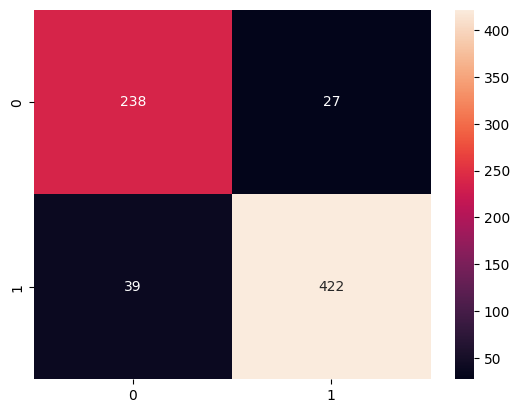

In [644]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, fmt = 'g')

So interpreting this confusion matrix. Out of the 726 predictions (20% of 3630) we have:<br>
*   238 times the model predicted they were going to drop out and they actually did
*   422 times the model predicted they were going to graduate and they actually did
*   27 times the model predicted they were going to drop out but they actually graduated (kudos!!)
*   39 times they model predicted they were going to graduate but they actually dropped out

If we want to improve the model through threshold tweaking, it serves us to think about which Error we want to focus on<br>
The Type I Error (False Positive) in this case is when the model predicts they're going to graduate but they actually drop out<br>
The Type II Error (False Negative) in this case is when the model predicts they're going to drop out but they actually graduate<br>
I would argue that it's better that we focus on having as few Type I errors in this case. We don't want the model to predict someone is going to graduate, setting them up for success, and then they actually drop out. The Type II error in this case is not deadly at all, which in can be in the cast of heart disease etc., but quite the opposite is rather delightful! But in the end, we will let the accuracy speak<br><br>
Let's evaluate with the default threshold of 0.5:

In [645]:
# Evaluation metrics for default threshold
print("Evaluation metrics with threshold 0.5:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

Evaluation metrics with threshold 0.5:
Accuracy: 0.9090909090909091
Precision: 0.9154013015184381
Recall: 0.9398663697104677
F1 score: 0.9274725274725274


**Improving the model by lowering our amount of Type I/Type II errors**

In [646]:
y_pred = logR.predict_proba(X_test)
y_pred = [1 if x[1] > 0.6 else 0 for x in y_pred] #List comprehension
# We increase the threshold from 0.5 to 0.6 in order to be classified as a 1

<Axes: >

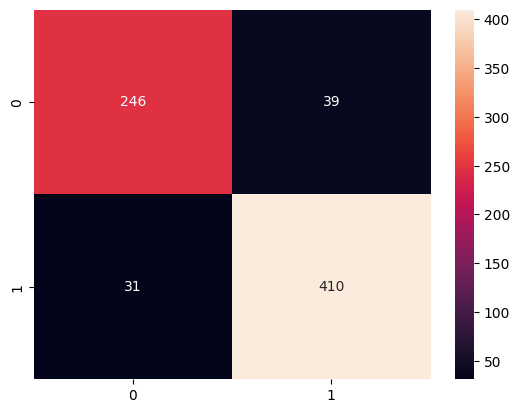

In [647]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, fmt = 'g')

In this updated confusion matrix we see that yes, we have 8 fewer Type I Errors but it came at the expense of 12 *more* Type II Errors. This becomes a question of fine balance. Let's construct a function to find the optimal threshold:



In [648]:
max_acc = 0
threshold = 0
for i in np.arange(0,2,0.05):
  y_pred = logR.predict_proba(X_test)
  y_pred = [1 if x[1] > float("{:.2f}".format(i)) else 0 for x in y_pred]
  acc = accuracy_score(y_pred, y_test)
  if acc > max_acc:
    max_acc = acc
    threshold = i
print(f"Maximum accuracy from threshold tweaking: {max_acc} with threshold {float('{:.2f}'.format(threshold))}")

Maximum accuracy from threshold tweaking: 0.9146005509641874 with threshold 0.4


We can actually increase our accuracy from 90.90 to 91.46! But we do so with the threshold of 0.4, meaning that we lower the amounts of Type II errors. Let's examine this:

<Axes: >

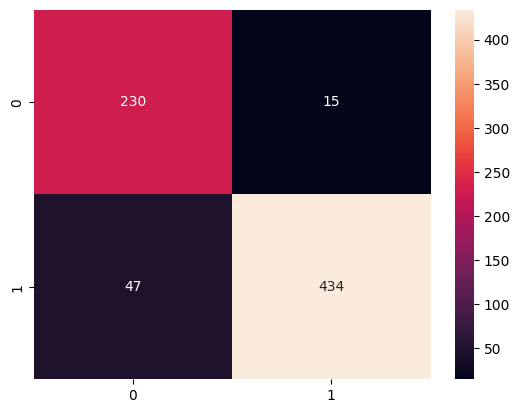

In [649]:
y_pred_best_threshold = logR.predict_proba(X_test)
y_pred_best_threshold = [1 if x[1] > 0.4 else 0 for x in y_pred_best_threshold]
sns.heatmap(confusion_matrix(y_pred_best_threshold, y_test), annot = True, fmt = 'g')

So we get the best accuracy score with our model when we prioritize lowering the Type II Errors. In the eyes of the model, it's a more efficient sacrifice to let Type I Errors (predict graduate but they drop out) and focus on lowering the delightful Type II Errors (predict drop out but they graduate), which honestly makes sense. Let's evaluate this:

In [650]:
# Evaluation metrics for new threshold
print("Evaluation metrics with threshold 0.9:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_threshold))
print("Precision:", precision_score(y_test, y_pred_best_threshold))
print("Recall:", recall_score(y_test, y_pred_best_threshold))
print("F1 score:", f1_score(y_test, y_pred_best_threshold))

Evaluation metrics with threshold 0.9:
Accuracy: 0.9146005509641874
Precision: 0.9022869022869023
Recall: 0.9665924276169265
F1 score: 0.9333333333333333


Compared to our default:

In [651]:
# Evaluation metrics for default threshold
print("Evaluation metrics with threshold 0.5:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

Evaluation metrics with threshold 0.5:
Accuracy: 0.38154269972451793
Precision: 0.0
Recall: 0.0
F1 score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It's an improvement in each and every one of them except Precision! Which is a trade-off that is worth it. Let's plot the ROC Curve:

Area Under the ROC Curve for threshold 0.5: 0.9577400239601842
Area Under the ROC Curve for threshold 0.4: 0.8984586686821096


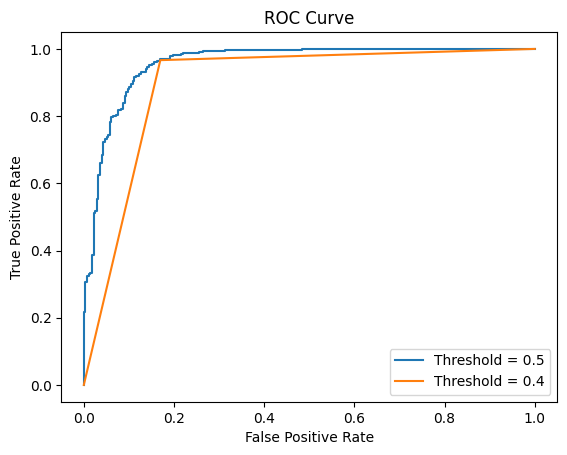

In [652]:
# ROC Curve
y_scores = logR.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.plot(fpr, tpr,  label = 'Threshold = 0.5')
print('Area Under the ROC Curve for threshold 0.5:', roc_auc_score(y_test, y_scores))

# For Threshold 0.4
fpr_, tpr_, thresholds_ = roc_curve(y_test, y_pred_best_threshold)
print('Area Under the ROC Curve for threshold 0.4:', roc_auc_score(y_test, y_pred_best_threshold))
plt.plot(fpr_, tpr_, label = 'Threshold = 0.4')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Interpretation of this after reading up on theory:<br><br>
Let's predict on the subset we left out for testing in the beginning!

In [653]:
df_final_test = df_test.drop(["Inflation rate", "Curricular units 1st sem (without evaluations)",
                       "Educational special needs", "Application order", "Father's occupation",
                       "GDP", "Curricular units 1st sem (evaluations)",
                       "Father's qualification"], axis=1)
df_final_test

,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Mother's occupation,Displaced,Debtor,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate
0,1,9,10,1,1,1,13,6,1,0,...,6,1,12.000000,0,6,14,2,11.000000,0,10.8
1,1,1,16,1,1,1,13,8,1,0,...,7,6,11.666667,0,7,8,6,13.500000,0,16.2
2,1,9,13,1,1,1,1,5,1,0,...,7,7,11.437500,0,8,9,8,11.425000,0,12.7
3,1,1,10,1,1,1,13,10,1,1,...,6,5,11.600000,0,6,12,4,11.000000,0,7.6
4,1,1,6,1,1,1,13,4,1,0,...,5,5,12.666667,0,5,7,4,13.000000,0,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,1,3,16,1,1,1,3,4,1,0,...,6,5,12.600000,0,6,9,3,11.666667,0,9.4
790,1,9,16,1,1,1,1,4,1,0,...,6,5,12.600000,0,6,6,6,13.000000,0,10.8
791,1,1,5,1,1,1,1,6,1,0,...,6,4,12.000000,0,6,8,2,11.333333,0,10.8
792,1,14,5,1,1,1,13,8,1,0,...,6,4,13.000000,2,6,7,5,12.200000,0,13.9


In [654]:
X_final_test = df_final_test
X_final_test = standard_scaler.fit_transform(X_final_test)
X_final_test.shape

(794, 26)

In [655]:
predictions = logR.predict(X_final_test)
print(predictions.shape)
predictions = predictions.reshape(-1,1)
print(predictions.shape)
predictions

(794,)
(794, 1)


array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [656]:
df_results_logreg = df_test.copy()
df_results_logreg['Prediction'] = predictions
df_results_logreg.Prediction.replace({0 : 'Dropout', 1 : 'Graduate'}, inplace= True)
df_results_logreg

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Prediction
0,1,9,1,10,1,1,1,13,28,6,...,0,6,14,2,11.000000,0,10.8,1.4,1.74,Dropout
1,1,1,1,16,1,1,1,13,14,8,...,0,7,8,6,13.500000,0,16.2,0.3,-0.92,Graduate
2,1,9,4,13,1,1,1,1,28,5,...,0,8,9,8,11.425000,0,12.7,3.7,-1.70,Graduate
3,1,1,1,10,1,1,1,13,28,10,...,0,6,12,4,11.000000,0,7.6,2.6,0.32,Graduate
4,1,1,1,6,1,1,1,13,14,4,...,0,5,7,4,13.000000,0,9.4,-0.8,-3.12,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,1,3,4,16,1,1,1,3,28,4,...,0,6,9,3,11.666667,0,9.4,-0.8,-3.12,Dropout
790,1,9,2,16,1,1,1,1,14,4,...,0,6,6,6,13.000000,0,10.8,1.4,1.74,Graduate
791,1,1,1,5,1,1,1,1,28,6,...,0,6,8,2,11.333333,0,10.8,1.4,1.74,Dropout
792,1,14,1,5,1,1,1,13,14,8,...,2,6,7,5,12.200000,0,13.9,-0.3,0.79,Graduate


In [657]:
df_results_logreg.Prediction.value_counts()

Graduate    442
Dropout     352
Name: Prediction, dtype: int64

With Logarithmic Regression out of the way and a good understanding of the dataset and the process, let's now build a Random Forest model and a XGBoost model and compare accuracy between them!

# **Building a Random Forest classifier**

In [658]:
df = df_before_feature_engineering
X = df.drop(columns = ['Target'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

In [659]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
3626,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
3627,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
3628,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [660]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [661]:
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

In [662]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [663]:
clf = clf.fit(X_train, y_train)

In [664]:
y_pred_train = clf.predict(X_train)
y_pred_train

array([0, 0, 1, ..., 1, 1, 1])

In [665]:
y_pred_test = clf.predict(X_test)
y_pred_test

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [666]:
clf.score(X_train, y_train)

1.0

In [667]:
clf.score(X_test, y_test)

0.8870523415977961

A typical case of overfitting haha. Let's check feature importance

In [668]:
clf.feature_importances_

array([0.00245612, 0.01837331, 0.01151925, 0.0251029 , 0.00214215,
       0.00465376, 0.00218292, 0.01547904, 0.01695962, 0.01973814,
       0.02033854, 0.00630875, 0.00088729, 0.01202464, 0.05568727,
       0.00916609, 0.01998132, 0.03383645, 0.00139054, 0.00670825,
       0.02148268, 0.02651024, 0.12213938, 0.07730374, 0.00377576,
       0.00580183, 0.02293435, 0.03517951, 0.21390487, 0.13637684,
       0.00281295, 0.01581233, 0.0147918 , 0.01623739])

<Axes: ylabel='Feature'>

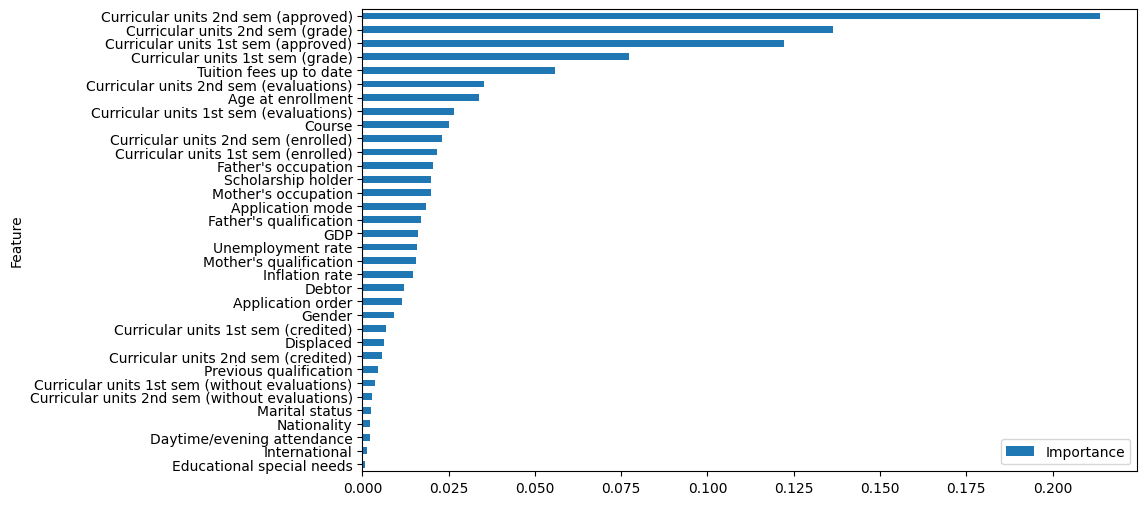

In [669]:
# avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns,
                                   'Importance': clf.feature_importances_})
feature_importance = feature_importance.sort_values('Importance',
                                                    ascending= True)
feature_importance.plot(x='Feature', y='Importance',
                        kind='barh', figsize=(10,6))

It's a bit different from the feature importance for our Logarithmic Regression model but the most important features are essentially all the same. 'Curricular units 2nd sem (approved) is unanimously the most important feature, but what the Random Forest classifier ranks as the 2nd most important, our Logarithmic Regression classifier ranks as the 11th. Further more, Logarithmic Regression classifier ranks International as the 5th most important (which is rather odd) while this Random Forest classifier ranks it as the second to least important! Very interesting<br><br>
We will remove the following columns: ['Educational sepcial needs', 'International', 'Daytime/evening attendance', 'Nationality', 'Marital status', 'Curricular units 2nd sem (without evaluations)', 'Curricular units 1st sem (without evaluations)', 'Previous qualification', 'Curricular units 2nd sem (credited)', 'Displaced', 'Curricular units 1st sem (credited)', 'Gender']

In [670]:
df_improved = df.drop( ['Educational special needs', 'International', 'Daytime/evening attendance',
                        'Nationality', 'Marital status', 'Curricular units 2nd sem (without evaluations)',
                        'Curricular units 1st sem (without evaluations)', 'Previous qualification',
                        'Curricular units 2nd sem (credited)', 'Displaced',
                        'Curricular units 1st sem (credited)', 'Gender'], axis=1)

In [671]:
df = df_improved
X = df.drop(columns = ['Target'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

In [672]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf = clf.fit(X_train, y_train)

In [673]:
clf.score(X_train, y_train)

1.0

In [674]:
clf.score(X_test, y_test)

0.8884297520661157

This didn't change the train score at all and actually lowered our test score?? Maybe Random Forest isn't the right pick here. Let's go back to the original dataset, do some hyperparameter tuning, and then do threshold tuning

In [675]:
df = df_before_feature_engineering
X = df.drop(columns = ['Target'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

In [676]:
# Hyperparameter tuning using RandomizedSearchCV
param_dist = {"max_depth": [3, 5],
    "max_features": sp_randint(1, 11),
    "min_samples_split": sp_randint(2, 11),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]}

In [677]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
    n_iter=20, cv=5)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d0712397e20>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d07100a2770>})

In [678]:
print(random_search.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 10, 'min_samples_split': 8}


In [679]:
clf = RandomForestClassifier(n_estimators=100, random_state=42, bootstrap= True,
                             criterion= 'gini', max_depth= 5, max_features= 6,
                             min_samples_split= 9)

In [680]:
clf = clf.fit(X_train, y_train)

In [681]:
clf.score(X_train, y_train)

0.9170110192837465

In [682]:
clf.score(X_test, y_test)

0.8884297520661157

We certainly reduced the overfitting but we did not improve our test score. Let's finally look at confusion matrixes and tweak our threshold value, following the same process we did with Logarithmic Regression:

In [683]:
y_pred = clf.predict(X_test)

<Axes: >

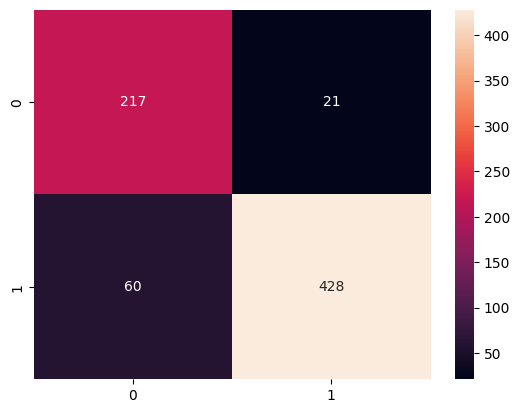

In [684]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, fmt = 'g')

In [685]:
# Evaluation metrics for default threshold
print("Evaluation metrics with threshold 0.5:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

Evaluation metrics with threshold 0.5:
Accuracy: 0.8884297520661157
Precision: 0.8770491803278688
Recall: 0.9532293986636972
F1 score: 0.9135538954108858


In [686]:
max_acc = 0
threshold = 0
for i in np.arange(0,2,0.05):
  y_pred = clf.predict_proba(X_test)
  y_pred = [1 if x[1] > float("{:.2f}".format(i)) else 0 for x in y_pred]
  acc = accuracy_score(y_pred, y_test)
  if acc > max_acc:
    max_acc = acc
    threshold = i
print(f"Maximum accuracy from threshold tweaking: {max_acc} with threshold {float('{:.2f}'.format(threshold))}")

Maximum accuracy from threshold tweaking: 0.8966942148760331 with threshold 0.45


<Axes: >

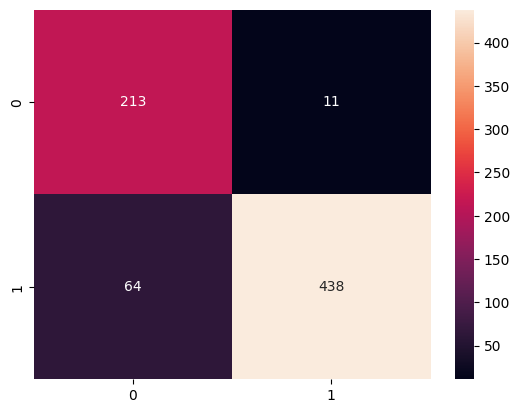

In [687]:
y_pred_best_threshold = clf.predict_proba(X_test)
y_pred_best_threshold = [1 if x[1] > 0.45 else 0 for x in y_pred_best_threshold]
sns.heatmap(confusion_matrix(y_pred_best_threshold, y_test), annot = True, fmt = 'g')

In [688]:
# Evaluation metrics for best threshold
print("Evaluation metrics with threshold 0.45:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_threshold))
print("Precision:", precision_score(y_test, y_pred_best_threshold))
print("Recall:", recall_score(y_test, y_pred_best_threshold))
print("F1 score:", f1_score(y_test, y_pred_best_threshold))

Evaluation metrics with threshold 0.45:
Accuracy: 0.8966942148760331
Precision: 0.8725099601593626
Recall: 0.9755011135857461
F1 score: 0.9211356466876971


Area Under the ROC Curve for threshold 0.5: 0.944232269061613
Area Under the ROC Curve for threshold 0.4: 0.8722270910889021


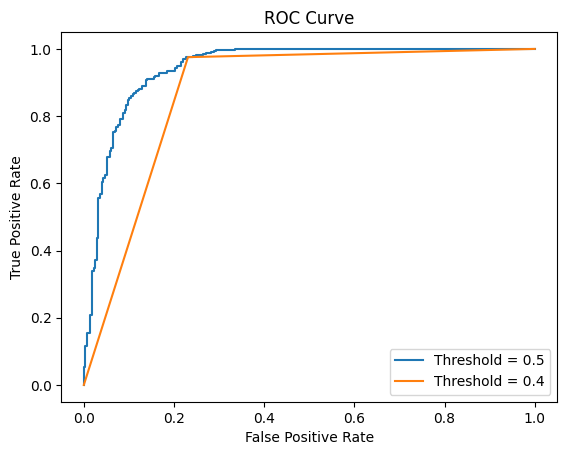

In [689]:
# ROC Curve
y_scores = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.plot(fpr, tpr,  label = 'Threshold = 0.5')
print('Area Under the ROC Curve for threshold 0.5:', roc_auc_score(y_test, y_scores))

# For Threshold 0.45
fpr_, tpr_, thresholds_ = roc_curve(y_test, y_pred_best_threshold)
print('Area Under the ROC Curve for threshold 0.4:', roc_auc_score(y_test, y_pred_best_threshold))
plt.plot(fpr_, tpr_, label = 'Threshold = 0.4')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Predicting on the test dataset with this optimal threshold value:

In [690]:
X_final_test = df_test.copy() # We didn't drop a single column, I almost forgot
X_final_test = standard_scaler.fit_transform(X_final_test)

predictions = clf.predict(X_final_test)
predictions = predictions.reshape(-1,1)
predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [691]:
df_results_randforest = df_test.copy()
df_results_randforest['Prediction'] = predictions
df_results_randforest.Prediction.replace({0 : 'Dropout', 1 : 'Graduate'}, inplace= True)
df_results_randforest

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Prediction
0,1,9,1,10,1,1,1,13,28,6,...,0,6,14,2,11.000000,0,10.8,1.4,1.74,Dropout
1,1,1,1,16,1,1,1,13,14,8,...,0,7,8,6,13.500000,0,16.2,0.3,-0.92,Dropout
2,1,9,4,13,1,1,1,1,28,5,...,0,8,9,8,11.425000,0,12.7,3.7,-1.70,Dropout
3,1,1,1,10,1,1,1,13,28,10,...,0,6,12,4,11.000000,0,7.6,2.6,0.32,Dropout
4,1,1,1,6,1,1,1,13,14,4,...,0,5,7,4,13.000000,0,9.4,-0.8,-3.12,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,1,3,4,16,1,1,1,3,28,4,...,0,6,9,3,11.666667,0,9.4,-0.8,-3.12,Dropout
790,1,9,2,16,1,1,1,1,14,4,...,0,6,6,6,13.000000,0,10.8,1.4,1.74,Dropout
791,1,1,1,5,1,1,1,1,28,6,...,0,6,8,2,11.333333,0,10.8,1.4,1.74,Dropout
792,1,14,1,5,1,1,1,13,14,8,...,2,6,7,5,12.200000,0,13.9,-0.3,0.79,Dropout


In [692]:
df_results_randforest.Prediction.value_counts()

Dropout    794
Name: Prediction, dtype: int64

No chill at all hahahahaha

**Building a XGBoost classifier**

After all models are built:
* Add report at the end of each model
* Pick a random student whose prediction is Drop out and one whose prediction is Graduate, and compare
* See how our findings compare to the 70 year old
* Share my personal experience
